Dataset 1992 breast-cancer - algorithms

Classes:

benign -> 0

malign -> 1

In [2]:
library(tidyverse)
library(psych)

if(!require('readr')) {
    install.packages('readr')
    library('readr')
}


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.0
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




**Load dataset csv**

In [3]:
df2 <- read_delim(paste("breast-cancer-1992-v4.csv","", sep=""),
	delim = ";",
	col_names = TRUE,
	escape_double = FALSE,
	col_types = cols(
		code = col_integer(),
		ClumpThickness = col_integer(),
		UniformityCellSize = col_integer(),
		UniformityCellShape = col_integer(),
		MarginalAdhesion = col_integer(),
		SingleEpithelialCellSize = col_integer(),
		BareNuclei = col_integer(),
		BlandChromatin = col_integer(),
		NormalNucleoli = col_integer(),
		Mitoses = col_integer(),
		Class = col_integer()
	),
	trim_ws = TRUE)


In [4]:
df2

code,ClumpThickness,UniformityCellSize,UniformityCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1000025,5,1,1,1,2,1,3,1,1,0
1002945,5,4,4,5,7,10,3,2,1,0
1015425,3,1,1,1,2,2,3,1,1,0
1016277,6,8,8,1,3,4,3,7,1,0
1017023,4,1,1,3,2,1,3,1,1,0
1017122,8,10,10,8,7,10,9,7,1,1
1018099,1,1,1,1,2,10,3,1,1,0
1018561,2,1,2,1,2,1,3,1,1,0
1033078,2,1,1,1,2,1,1,1,5,0


In [5]:
table(df2$Class)


  0   1 
458 241 

**Split dataset**

In [6]:
library(caret)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [7]:
# split dataset in training and test sets
set.seed(123)
division <- sample(nrow(df2), floor(0.7 * nrow(df2)), replace = FALSE)
training <- df2[division, ]
test <- df2[-division, ]

In [8]:
training_set <- training[, 2:10]
test_set <- test[, 2:10]

In [9]:
head(training)

code,ClumpThickness,UniformityCellSize,UniformityCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1238948,8,5,6,2,3,10,6,6,1,1
1276091,6,1,1,3,2,1,1,1,1,0
1202125,4,1,1,1,2,1,3,1,1,0
769612,3,1,1,2,2,1,1,1,1,0
1212422,3,1,1,1,2,1,3,1,1,0
1173509,4,5,5,10,4,10,7,5,8,1


In [10]:
head(training_set)

ClumpThickness,UniformityCellSize,UniformityCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
8,5,6,2,3,10,6,6,1
6,1,1,3,2,1,1,1,1
4,1,1,1,2,1,3,1,1
3,1,1,2,2,1,1,1,1
3,1,1,1,2,1,3,1,1
4,5,5,10,4,10,7,5,8


In [11]:
head(test_set)

ClumpThickness,UniformityCellSize,UniformityCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
5,1,1,1,2,1,3,1,1
5,4,4,5,7,10,3,2,1
3,1,1,1,2,2,3,1,1
6,8,8,1,3,4,3,7,1
1,1,1,1,2,10,3,1,1
2,1,1,1,2,1,1,1,5


-----------------------------------------------------------------------------

**KNN**

In [56]:
library(class)

# KNN model
model_knn <- knn(training_set, test_set, training$Class, k = 5)
print('Confusion matrix train')
table(factor(model_knn))

# predictions
predictions <- as.factor(model_knn) # convert to factor

# evaluate the performance of the model
confusion_matrix <- table(predictions, test$Class)
accuracy <- sum(diag(confusion_matrix))/sum(confusion_matrix)

print('Confusion matrix test')
confusion_matrix
print('accuracy:')
accuracy

[1] "Confusion matrix train"



  0   1 
144  66 

[1] "Confusion matrix test"


           
predictions   0   1
          0 144   0
          1   6  60

[1] "accuracy:"


[1] 0.9714286

-----------------------------------------------------------------------------

**Naive Bayes**

In [57]:
#Training model
library(e1071)
naive_classifier=naiveBayes(training_set,training$Class)

In [58]:
#Evaluating model performance
naive_test_pred=predict(naive_classifier,test_set)
naive_test_pred

[1] 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1
 [38] 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1
 [75] 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
[149] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1
[186] 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
Levels: 0 1

In [59]:
install.packages("gmodels")

Installing gmodels [2.18.1.1] ...
	OK [linked cache]


In [60]:
library(gmodels)
CrossTable(naive_test_pred,test$Class,prop.chisq = FALSE, prop.t = FALSE, prop.r = FALSE, dnn = c('predicted', 'actual'))


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Col Total |
|-------------------------|

 
Total Observations in Table:  210 

 
             | actual 
   predicted |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
           0 |       138 |         1 |       139 | 
             |     0.920 |     0.017 |           | 
-------------|-----------|-----------|-----------|
           1 |        12 |        59 |        71 | 
             |     0.080 |     0.983 |           | 
-------------|-----------|-----------|-----------|
Column Total |       150 |        60 |       210 | 
             |     0.714 |     0.286 |           | 
-------------|-----------|-----------|-----------|

 


-----------------------------------------------------------------------------

**Logistic regression**

In [102]:
logistic_reg_model <- glm(Class ~ ., data = training, family = binomial)
summary(logistic_reg_model)


Call:
glm(formula = Class ~ ., family = binomial, data = training)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-3.09046  -0.13085  -0.06520   0.02169   2.35702  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -9.250e+00  1.410e+00  -6.559 5.42e-11 ***
code                      9.485e-08  5.890e-07   0.161 0.872076    
ClumpThickness            5.034e-01  1.807e-01   2.786 0.005337 ** 
UniformityCellSize        3.429e-01  2.599e-01   1.319 0.187099    
UniformityCellShape       5.530e-01  3.271e-01   1.691 0.090904 .  
MarginalAdhesion          9.208e-02  1.519e-01   0.606 0.544457    
SingleEpithelialCellSize -9.251e-02  2.345e-01  -0.394 0.693266    
BareNuclei                4.884e-01  1.410e-01   3.464 0.000531 ***
BlandChromatin            2.687e-01  2.133e-01   1.260 0.207820    
NormalNucleoli            3.446e-02  1.348e-01   0.256 0.798198    
Mitoses                   3.128e-01  3.343e-0

In [111]:
predicted_lg <- predict(logistic_reg_model, test, type = "response")
predictedClass_lg <- ifelse(predicted_lg > 0.5, 1, 0)

In [122]:
confusion_matrix_lg <- table(test$Class, predictedClass_lg)
confusion_matrix_lg

   predictedClass_lg
      0   1
  0 144   6
  1   2  58

In [124]:
accuracy_lg <- sum(diag(confusion_matrix_lg))/sum(confusion_matrix_lg)

print(paste("accuracy:", accuracy_lg))

[1] "accuracy: 0.961904761904762"


-----------------------------------------------------------------------------------------------------------------------------------

**Support vector machine (SVM)**

In [1]:
#load required library
library(e1071)


In [17]:
#build svm model
svm_model<- 
    svm(formula = factor(Class) ~ ., data = training, type = "C-classification", 
        kernel = "linear", scale = FALSE)

In [18]:
svm_model


Call:
svm(formula = factor(Class) ~ ., data = training, type = "C-classification", 
    kernel = "linear", scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  259


In [23]:
#compute training accuracy
pred_train <- predict(svm_model, training)
mean(pred_train == training$Class)

[1] 0.6298569

In [34]:
confusion_matrix_training_svm <- table(training$Class, pred_train)
confusion_matrix_training_svm

   pred_train
      0   1
  0 308   0
  1 181   0

In [24]:
#compute test accuracy
pred_test <- predict(svm_model, test)
mean(pred_test == test$Class)

[1] 0.7142857

In [32]:
confusion_matrix_svm <- table(test$Class, pred_test)
confusion_matrix_svm

   pred_test
      0   1
  0 150   0
  1  60   0

In [31]:
accuracy_svm <- sum(diag(confusion_matrix_svm))/sum(confusion_matrix_svm)
print(paste("accuracy:", accuracy_svm))

[1] "accuracy: 0.714285714285714"


**Gamma and cost selection **

In [45]:
svm_tune_cost<-tune.svm(factor(Class) ~ ., data=training, cost=c(0.1,10),gamma=0, kernel="linear")
best_model_svm<-svm_tune_cost$best.model
prediction_best_model_svm<-predict(best_model_svm,test)


In [66]:
summary(svm_tune_cost)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
     0  0.1

- best performance: 0.03061224 

- Detailed performance results:
  gamma cost      error dispersion
1     0  0.1 0.03061224 0.02925961
2     0 10.0 0.03877551 0.03109967


In [47]:
confusion_matrix_bm_svm <- table(test$Class, prediction_best_model_svm)
confusion_matrix_bm_svm

   prediction_best_model_svm
      0   1
  0 144   6
  1   1  59

In [48]:
accuracy_bm_svm <- sum(diag(confusion_matrix_bm_svm))/sum(confusion_matrix_bm_svm)
print(paste("accuracy:", accuracy_bm_svm))

[1] "accuracy: 0.966666666666667"


**Gamma parameter test**

In [63]:
svm_tune_cost_gamma<-tune.svm(factor(Class) ~ ., data=training, cost=c(0.1,10),gamma=c(0,0.1,1,5,10), kernel="linear")
best_model_gamma_svm<-svm_tune_cost_gamma$best.model
prediction_best_model_gamma_svm<-predict(best_model_gamma_svm,test)

summary(best_model_gamma_svm)


Call:
best.svm(x = factor(Class) ~ ., data = training, gamma = c(0, 0.1, 
    1, 5, 10), cost = c(0.1, 10), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 

Number of Support Vectors:  49

 ( 24 25 )


Number of Classes:  2 

Levels: 
 0 1





Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
     0  0.1

- best performance: 0.03069728 

- Detailed performance results:
   gamma cost      error dispersion
1    0.0  0.1 0.03069728  0.0240928
2    0.1  0.1 0.03069728  0.0240928
3    1.0  0.1 0.03069728  0.0240928
4    5.0  0.1 0.03069728  0.0240928
5   10.0  0.1 0.03069728  0.0240928
6    0.0 10.0 0.03681973  0.0251040
7    0.1 10.0 0.03681973  0.0251040
8    1.0 10.0 0.03681973  0.0251040
9    5.0 10.0 0.03681973  0.0251040
10  10.0 10.0 0.03681973  0.0251040


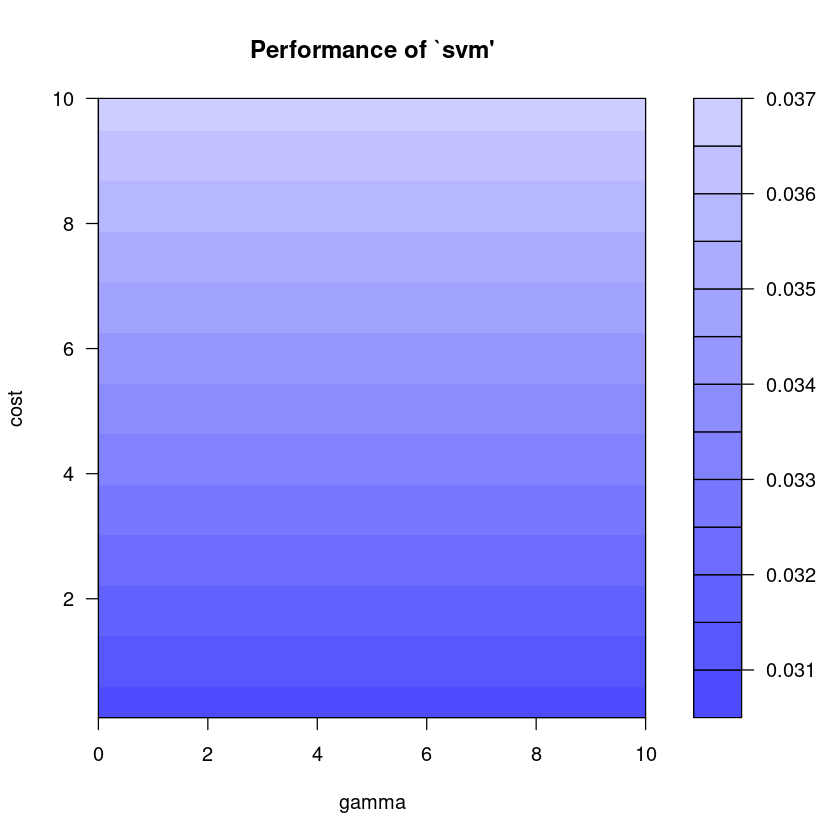

In [64]:
summary(svm_tune_cost_gamma)
plot(svm_tune_cost_gamma)

In [59]:
confusion_matrix_bm_gamma_svm <- table(test$Class, prediction_best_model_gamma_svm)
confusion_matrix_bm_gamma_svm

   prediction_best_model_gamma_svm
      0   1
  0 144   6
  1   1  59

In [60]:
accuracy_bm_gamma_svm <- sum(diag(confusion_matrix_bm_gamma_svm))/sum(confusion_matrix_bm_gamma_svm)
print(paste("accuracy:", accuracy_bm_gamma_svm))

[1] "accuracy: 0.966666666666667"


-----------------------------------------------------------------------------------------------------------------------------------

**Random forest**

In [66]:
install.packages("randomForest")
library(randomForest)

Installing randomForest [4.7-1.1] ...
	OK [linked cache]


In [67]:
rf_model <- randomForest(factor(Class) ~ ., data = training, ntree = 100, importance = TRUE)
predicciones <- predict(rf_model, test)

In [91]:
predicciones

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  0   1   0   1   0   0   1   0   1   0   0   0   0   1   1   1   1   1   1   0 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   0   1   0   0   1   0   0   0   0   0   0   1   1   1   0   1   0   1   0 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  0   0   0   0   1   0   0   0   0   0   0   0   0   0   1   1   0   1   1   0 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  1   1   1   0   1   0   1   1   1   1   1   1   0   1   1   0   1   1   0   1 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  1   1   0   1   1   0   0   0   1   1   1   1   0   1   0   0   1   1   1   1 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  0   1   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  0   0   0   0   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
  0   0   0   0   0   0   1   0   0   0   0   1   0   0   0   0   0   0   0   0 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 
  0   0   0   0   0   0   1   0   0   0   0   0   0   0   1   1   1   0   0   0 
181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 
  0   1   0   0   1   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0 
201 202 203 204 205 206 207 208 209 210 
  0   0   0   0   0   0   0   1   0   0 
Levels: 0 1

In [68]:
confusion_matrix_rf <- table(test$Class, predicciones)
accuracy_rf <- sum(diag(confusion_matrix_rf))/sum(confusion_matrix_rf)

print("Confusion matrix")
confusion_matrix_rf

print(paste("accuracy:", accuracy_rf))


[1] "Confusion matrix"


   predicciones
      0   1
  0 144   6
  1   0  60

[1] "accuracy: 0.971428571428571"


-----------------------------------------------------------------------------

In [69]:
library(tidymodels)

**Decision tree**

In [70]:
decisionTree_spec <- decision_tree() %>%
set_engine("rpart") %>%
set_mode("classification")

In [71]:
decisionTree_spec <-decisionTree_spec %>%
	fit(formula = factor(Class) ~ .,
	data = training)

In [72]:
predictionsDecisionTree <- predict(decisionTree_spec, test)

In [73]:
confusion_matrix_dTree <- table(test$Class, predictionsDecisionTree$.pred_class)
accuracy_dTree <- sum(diag(confusion_matrix_dTree))/sum(confusion_matrix_dTree)

In [74]:
print("Confusion matrix")
confusion_matrix_dTree

print(paste("accuracy:", accuracy_dTree))

[1] "Confusion matrix"


   
      0   1
  0 140  10
  1   1  59

[1] "accuracy: 0.947619047619048"


------------------------------------------------------------------------------------------------

**Boost tree**

In [75]:

# Create the specification with placeholders
boost_spec <- boost_tree(
                trees = 500,
                learn_rate = tune(),
                tree_depth = tune(),
                sample_size = tune()) %>%
  set_mode("classification") %>%
  set_engine("xgboost")


In [76]:
# Create the tuning grid
tunegrid_boost <- grid_regular(parameters(boost_spec), 
                               levels = 3)

tunegrid_boost

tree_depth,learn_rate,sample_size
<int>,<dbl>,<dbl>
1,0.00100000,0.10
8,0.00100000,0.10
15,0.00100000,0.10
1,0.01778279,0.10
8,0.01778279,0.10
15,0.01778279,0.10
1,0.31622777,0.10
8,0.31622777,0.10
15,0.31622777,0.10


In [77]:
# Create CV folds of training data
folds <- vfold_cv(training, v = 6)

# Tune along the grid
tune_results <- tune_grid(boost_spec,
                          factor(Class) ~ .,
                          resamples = folds,
                          grid = tunegrid_boost,
                          metrics = metric_set(roc_auc))


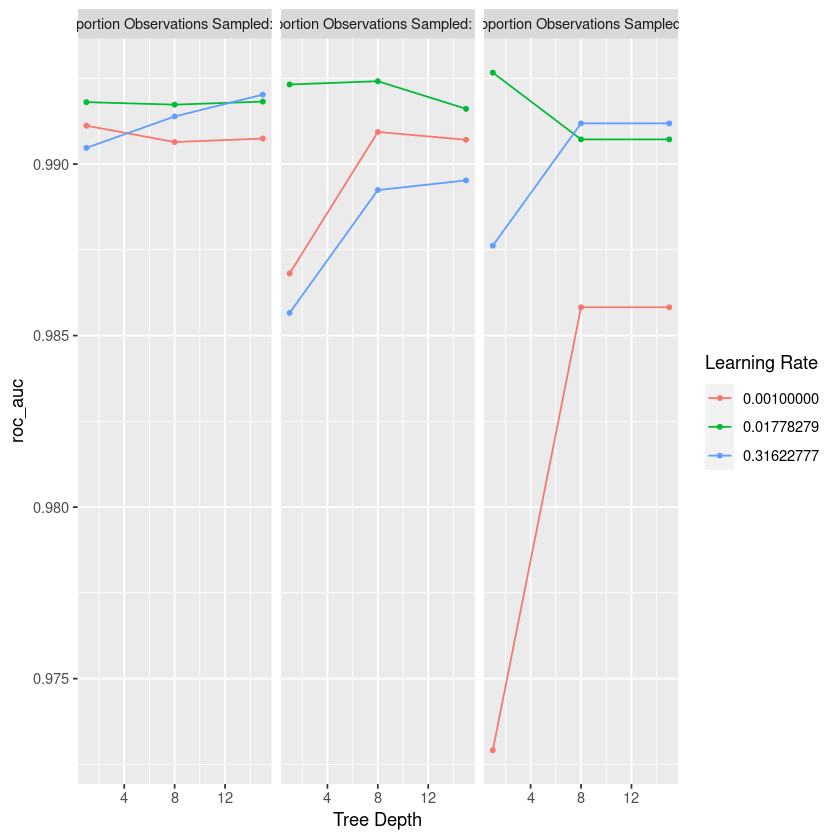

In [78]:
# Plot the results
autoplot(tune_results)

In [79]:
# Select the final hyperparameters
best_params <- select_best(tune_results)

best_params

tree_depth,learn_rate,sample_size,.config
<int>,<dbl>,<dbl>,<chr>
1,0.01778279,1,Preprocessor1_Model22


In [80]:
# Finalize the specification
final_spec <- finalize_model(boost_spec, best_params)
final_spec

Boosted Tree Model Specification (classification)

Main Arguments:
  trees = 500
  tree_depth = 1
  learn_rate = 0.0177827941003892
  sample_size = 1

Computational engine: xgboost 


In [81]:
# Train the final model on the full training data
final_model <- final_spec %>% fit(formula = factor(Class) ~ ., 
                                  data = training)

final_model

parsnip model object

##### xgb.Booster
raw: 374.1 Kb 
call:
  xgboost::xgb.train(params = list(eta = 0.0177827941003892, max_depth = 1L, 
    gamma = 0, colsample_bytree = 1, colsample_bynode = 1, min_child_weight = 1, 
    subsample = 1), data = x$data, nrounds = 500, watchlist = x$watchlist, 
    verbose = 0, nthread = 1, objective = "binary:logistic")
params (as set within xgb.train):
  eta = "0.0177827941003892", max_depth = "1", gamma = "0", colsample_bytree = "1", colsample_bynode = "1", min_child_weight = "1", subsample = "1", nthread = "1", objective = "binary:logistic", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.evaluation.log()
# of features: 10 
niter: 500
nfeatures : 10 
evaluation_log:
    iter training_logloss
       1       0.68028182
       2       0.66785979
---                      
     499       0.07783991
     500       0.07778679

In [101]:
predictionsBoost <- predict(final_model, test)


In [83]:
mean(predictionsBoost$.pred_class==test$Class)

[1] 0.9571429

In [84]:
confusion_matrix_boost <- table(test$Class, predictionsBoost$.pred_class)
accuracy_boost <- sum(diag(confusion_matrix_boost))/sum(confusion_matrix_boost)

print("Confusion matrix")
confusion_matrix_boost

print(paste("accuracy:", accuracy_boost))

[1] "Confusion matrix"


   
      0   1
  0 144   6
  1   3  57

[1] "accuracy: 0.957142857142857"
